In [1]:
import os
os.chdir('..')
from notebooks import config
import geopandas as gpd
import numpy as np
from utils.geotif_io import readTiff, writeTiff
from utils.imgShow import imgShow
from utils.buffer_remove import buffer_remove
import matplotlib.pyplot as plt
from swatnet_infer import get_s1pair_nor
from utils.transform_xy import coor2coor, imagexy2geo, geo2imagexy



In [2]:
scene_id = '02'
path_s1as_scene = 'data/s1_ascend/s1_as_scene_' + scene_id + '.tif'
path_s1des_scene = 'data/s1_descend/s1_des_scene_' + scene_id + '.tif'



In [3]:
s1_as, s1_as_info = readTiff(path_in=path_s1as_scene)
s1_des, s1_des_info = readTiff(path_in=path_s1des_scene)
print(s1_as_info)



{'geoextent': (401909.45572276646, 440635.5144704822, 3831095.8595247255, 3865802.8874324984), 'geotrans': (401909.45572276646, 9.99640132878568, 0.0, 3865802.8874324984, 0.0, -9.99626379832176), 'geosrs': '32647', 'row': 3472, 'col': 3874, 'bands': 2}


In [4]:
s1_img_nor = get_s1pair_nor(s1_as=s1_as, s1_des=s1_des)



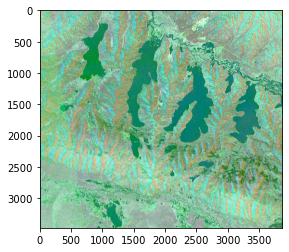

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,1,1)
imgShow(s1_img_nor, color_bands=(2,1,0), clip_percent=2)


In [58]:
# import random

# class missing_band:
#     '''scene-based, numpy-based
#        des: randomly 2-bands (ascending/descending) missing.
#             this augmentation is due to the randomly data missing 
#             in term of ascending and descending bands in tibet, respectively.
#        '''
#     def __init__(self, prob=0.5):
#         self.p = prob
#     def __call__(self, scene):
#         if random.random() > self.p:
#             return scene
#         else:
#             scene_miss = scene.copy()
#             h_scene, w_scene = scene.shape[1], scene.shape[2]
#             row_start, col_start = random.randint(0, h_scene-100), random.randint(0, w_scene-100)
#             h_miss = random.randint(100, h_scene-row_start)
#             w_miss = random.randint(100, w_scene-col_start)
#             if random.random() > 0.5:
#                 scene_miss[0:2, row_start:row_start+h_miss, col_start:col_start+w_miss] = 0
#             else:
#                 scene_miss[2:4, row_start:row_start+h_miss, col_start:col_start+w_miss] = 0

#             return scene_miss
        


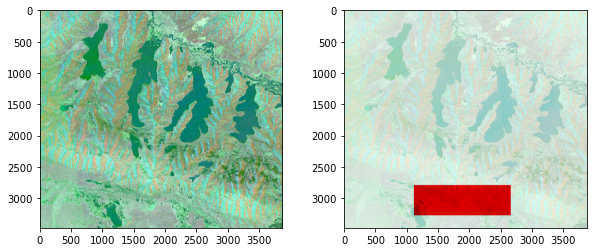

In [68]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
imgShow(s1_img_nor, color_bands=(2,1,0), clip_percent=2)

s1_img_nor_ = s1_img_nor.transpose(2,0,1)
plt.subplot(1,2,2)
s1_band_miss = missing_band(prob=0.5)(s1_img_nor_)
imgShow(s1_band_miss.transpose(1,2,0), color_bands=(2,1,0), clip_percent=2)

